# Исследование рынка игровых платформ 


# **Описание проекта**<br>

**Заказчик** - интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы <br>
<br>
**Задача** - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**
Name — название игры <br>
Platform — платформа <br>
Year_of_Release — год выпуска <br>
Genre — жанр игры <br>
NA_sales — продажи в Северной Америке (миллионы проданных копий) <br>
EU_sales — продажи в Европе (миллионы проданных копий) <br>
JP_sales — продажи в Японии (миллионы проданных копий) <br>
Other_sales — продажи в других странах (миллионы проданных копий) <br>
Critic_Score — оценка критиков (максимум 100) <br>
User_Score — оценка пользователей (максимум 10) <br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категори

1. Зависят ли продажи в разных странах от жанра?
2. влияет ли год выпуска на оценку пользователей?
3. Совпадает ли оценка пользователей с оценкой критиков?

## Изучим общую информацию о данных

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


In [146]:
data = pd.read_csv("/datasets/games.csv")

In [147]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [149]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Вывод: Самые большие продажи в Северной Америке, наименьшие в Японии. 

В данных замечены следующие проблемы:
1. Неверный тип данных в некоторых стобцах
2. Следует поменять названия столбцов 
3. Необходимо обработать пропуски
4. Аномальные значения на данном этапе не выявлены
5. Дубликатов нет 

## Предобработка данных

In [150]:
data.rename(columns={'Year_of_Release':'year','NA_sales':'na', 'EU_sales':'eu', 'JP_sales':'jp', 'Other_sales':'other'}, inplace=True)
data.columns = data.columns.str.lower()
data['total_revenue'] = data['eu'] + data['na'] + data['jp'] + data['other'] #добавляем новый столбец с общей выручкой регионов
data['total_revenue'] 


0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_revenue, Length: 16715, dtype: float64

In [151]:
data.isna().sum()
#data.isna().mean()*100 - доля пропущенных значений

name                2
platform            0
year              269
genre               2
na                  0
eu                  0
jp                  0
other               0
critic_score     8578
user_score       6701
rating           6766
total_revenue       0
dtype: int64

In [152]:
#Более подробно изучим пропуски в столбце year
data[data['year'].isna()]

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total_revenue
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [153]:
data['year'].isna().mean() * 100

1.609332934489979

In [154]:
data = data.dropna(subset=['year']) #пропусков в этом столлбце мало (всего 1,6% от общего кол-ва значений), в дальнейшем они нам не понадобятся, так что просто удалим
data['year'] = data['year'].astype('Int64') #зададим числовой тип для дальнейшей работы
data['critic_score'] = data['critic_score'].astype('float') #оценка критика варьируется от 0 до 100


In [155]:
data['user_score'].unique() #обработаем значение tbd

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [156]:
data[data['user_score']=='tbd']

,name,platform,year,genre,na,eu,jp,other,critic_score,user_score,rating,total_revenue
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


***TBD - аббревиатура от английского To Be Determined (будет определено)***, то есть, мы можем сказать, что значение неизвестно - заменим tbd на unknown. Позже они нам понадобятся.

In [157]:
data['us_score_unknown'] = data['user_score'].replace('tbd', 'unknown', regex=True)
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data['user_score'] = data['user_score'].astype('float') #оценка пользователя варьируется от 0 до 10


In [158]:
data.isnull().sum()


name                   2
platform               0
year                   0
genre                  2
na                     0
eu                     0
jp                     0
other                  0
critic_score        8463
user_score          8983
rating              6678
total_revenue          0
us_score_unknown    6607
dtype: int64

In [159]:
data['rating'].unique() 

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**«EC» («Early childhood») — «Для детей младшего возраста»<br>
«E» («Everyone») — «Для всех»<br>
«E10+» («Everyone 10 and older»)<br>
«T» («Teen») — «Подросткам»<br>
«M» («Mature») — «Для взрослых»<br>
«AO» («Adults Only 18+») — «Только для взрослых»<br>
«RP» («Rating Pending») — «Рейтинг ожидается»<br>
«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»<br>
«K-A» — «Для детей и взрослых»<br>**

In [160]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [161]:
#такие рейтинки как EC, K-A, AO, RP - встречаются очень редко, поэтому их мы присоеденим к другим. 
data['rating'] = data['rating'].replace('EC', 'E10+', regex=True)
data['rating'] = data['rating'].replace('K-A', 'E10+', regex=True)
data['rating'] = data['rating'].replace('AO', 'M', regex=True)
data['rating'] = data['rating'].replace('RP', 'E', regex=True)

In [162]:
data = data.drop_duplicates()

**Вывод:** Были заменены типы данных в некоторых стобцах. Добавлен новый столбец 'total_coast', который содержит суммарыне продажи по регионам. Пропуски в столбцах critic_score, user_score, rating могут быть связаны с тем, что фильм новый и не успел получить свою оценку. Их трогать не будем

## Исследовательский анализ данных

Text(0.5, 1.0, 'Временной график')

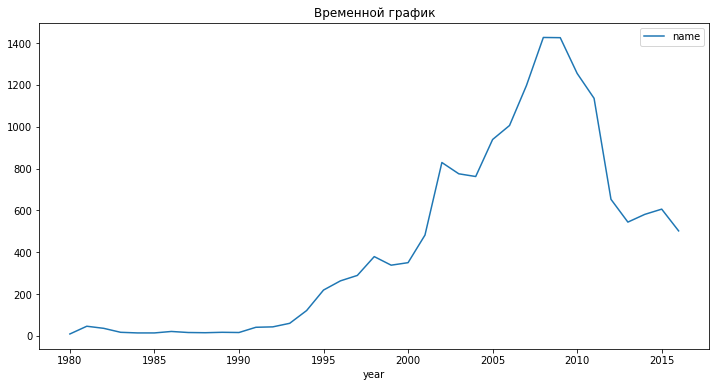

In [163]:
data.pivot_table(index='year', values='name', aggfunc='count').plot(figsize=(12,6))
plt.title("Временной график")



Больше всего игр было выпущено в период с 2005 по 2011 годы. Данные за периоды до 1994 очень малы, скорее всего это связано с перенасыщением рынка в 1982-1895 гг. Учитывать приставки третьего - шестого поколений не будем.
<br>
<br>
Выберем платформы с наибольшими суммарными продажами за год и построим график.

In [164]:
top_platform = pd.pivot_table(data, values='total_revenue', index='platform',
                              aggfunc={'total_revenue': sum}).sort_values(by='total_revenue').tail(10)
top_platform

,total_revenue
platform,
3DS,257.81
PSP,289.53
GBA,312.88
PS4,314.14
PS,727.58
DS,802.78
Wii,891.18
PS3,931.34
X360,961.24


<AxesSubplot:xlabel='platform'>

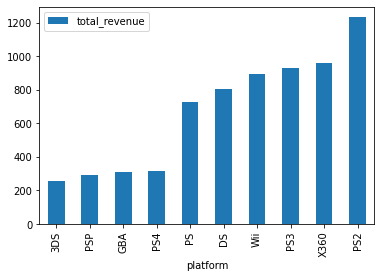

In [165]:
top_platform.plot(kind='bar')

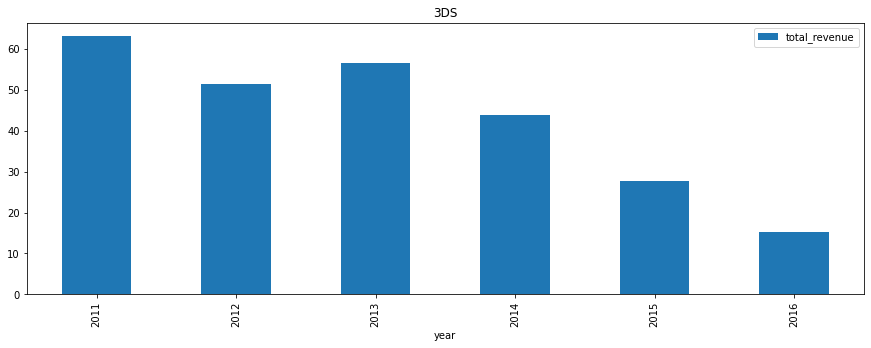

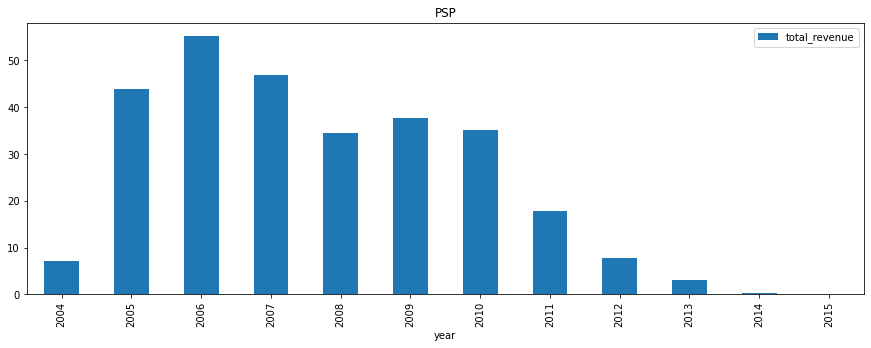

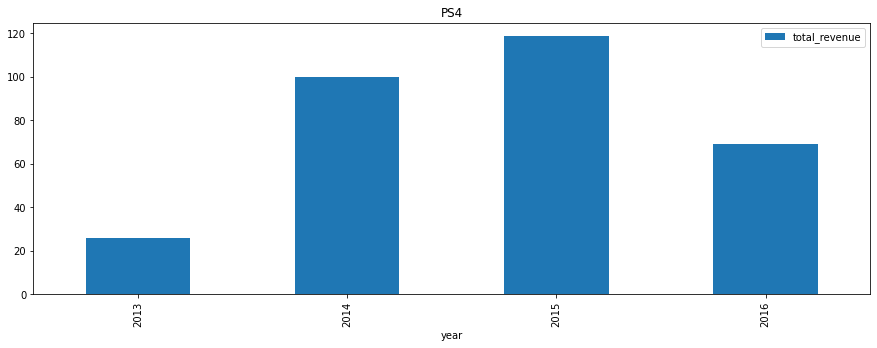

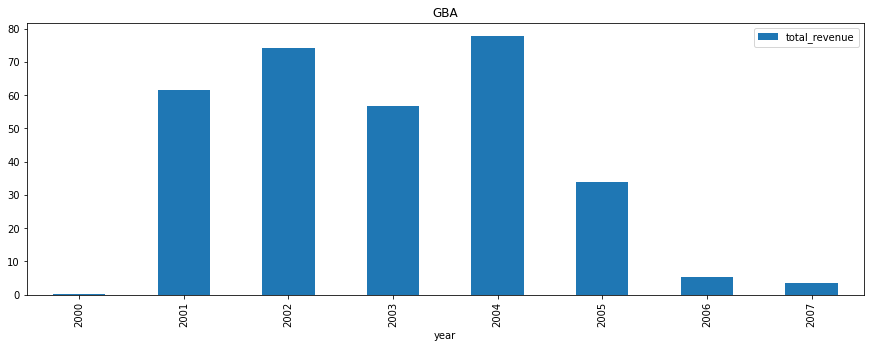

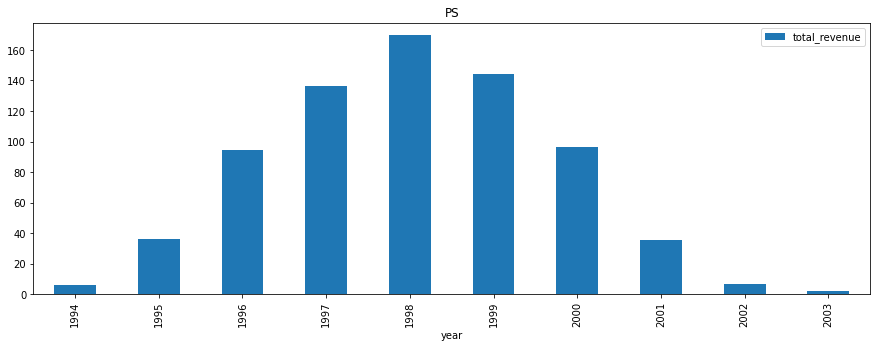

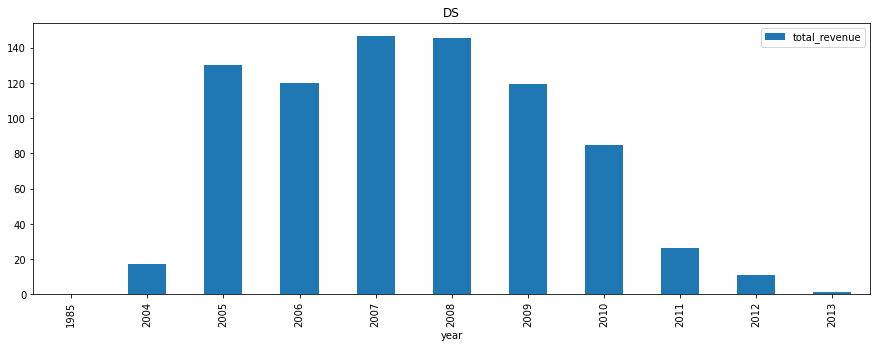

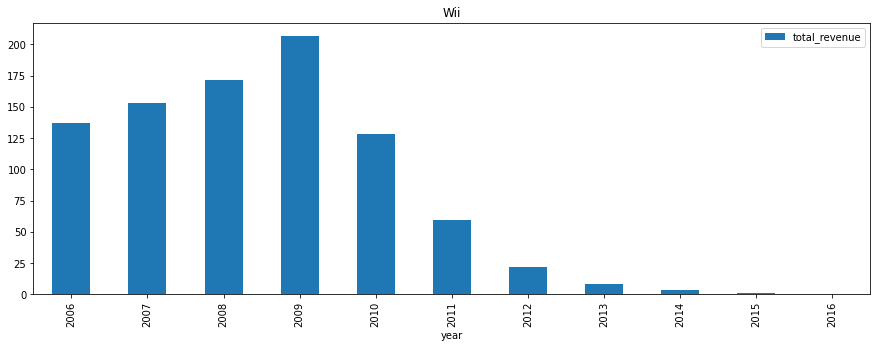

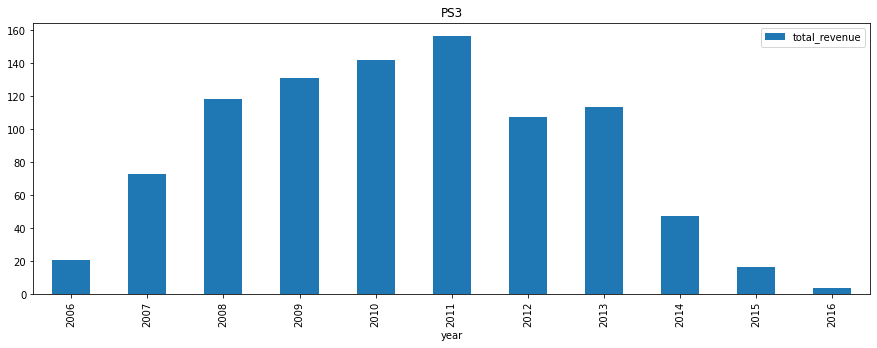

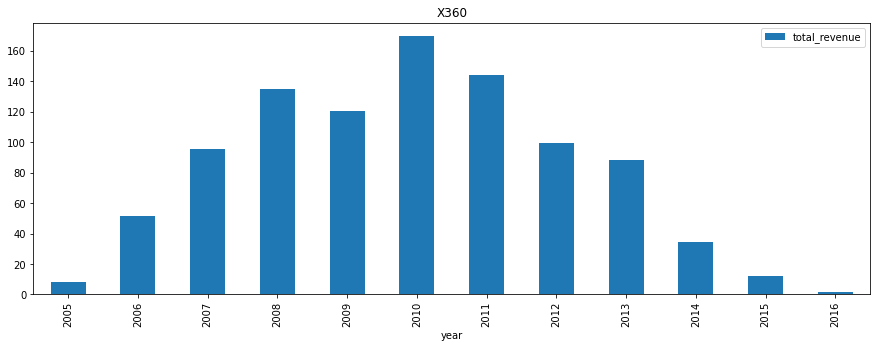

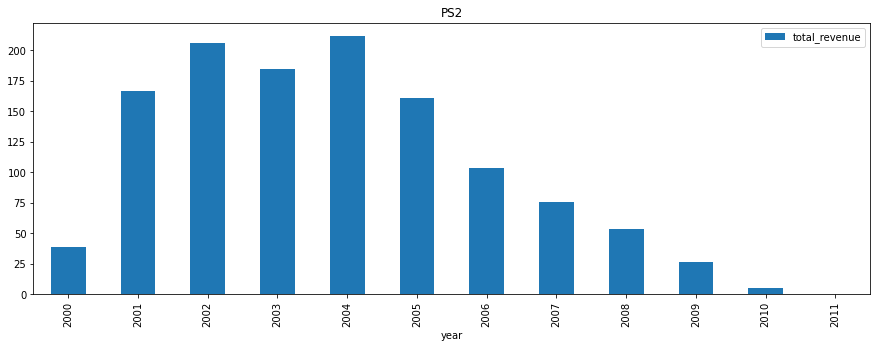

In [166]:
top_platform_list = ['3DS', 'PSP', 'PS4', 'GBA', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'] 
for platform in top_platform_list:
    data[data['platform'] == platform].pivot_table(index = 'year', values = 'total_revenue', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))
    plt.title(platform)
    


**Вывод** <br>
С уходом Sega с рынка игровых приставок (начало 2000-х) на нём осталось лишь три крупных производителя: японские компании Sony и Nintendo и американская Microsoft. PS2 - была наиболее популярна с 2001 по 2005 годы, позде ее сменило обновление PS3 и платформы X360  и Wii. ***В последний период наиболее популярной стала PS4***. Также, можно заметить, что  ***средняя продолжительность существования платформы - 10 лет, пик продаж каждой приходится на середину ее существования.*** Новая платформа появляется примерно каждые 4 года.

<AxesSubplot:xlabel='year'>

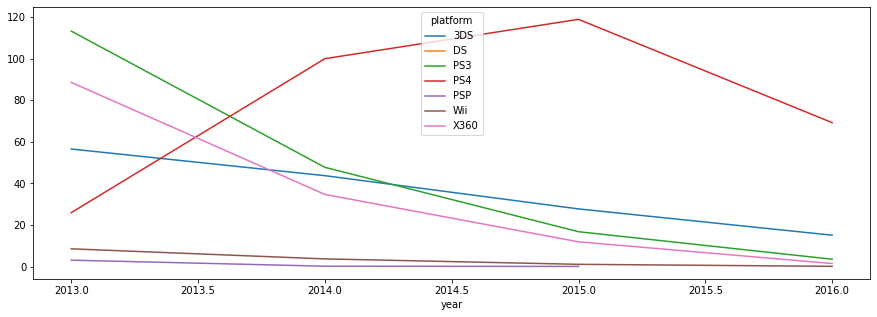

In [167]:
data.query('year>2012 and platform in @top_platform_list').pivot_table(index='year', columns = 'platform', values='total_revenue', aggfunc='sum').plot(figsize=(15, 5))


<AxesSubplot:xlabel='year'>

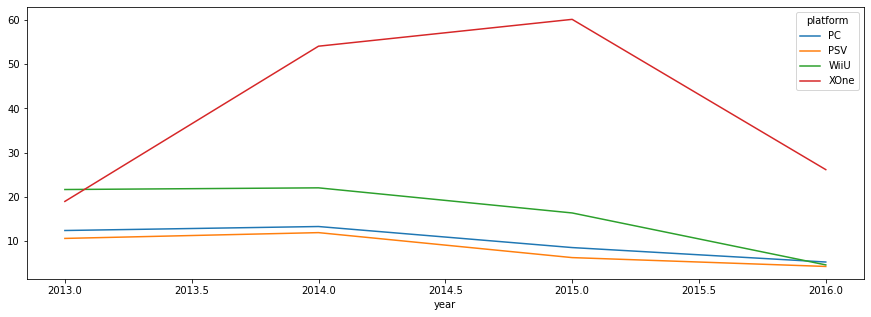

In [168]:
data.query('year>2012 and platform not in @top_platform_list').pivot_table(index='year', columns = 'platform', values='total_revenue', aggfunc='sum').plot(figsize=(15, 5))


**Вывод**<br>
В период с 2005 по 2010 наиболее прибыльной была платформа Wii, далее ее сменили PS3 и X360. 

В нынешнее время спрос на них значительно упал в виду появлвения новой **PS4**, на данны момент она является **самой прибыльной**, также **потенциальной прибыльно можно считать PC**, так как ее показатели довольно стабилны. 

***С 2010 года мы наблюдаем резкий спад популярности игровых платформ, т.к. восьмое поколение сменили мобильные приложения.***(https://apptractor.ru/info/articles/evolyutsiya-v-vashem-karmane-kak-razvivalis-mobilnyie-prilozheniya.html)

<AxesSubplot:>

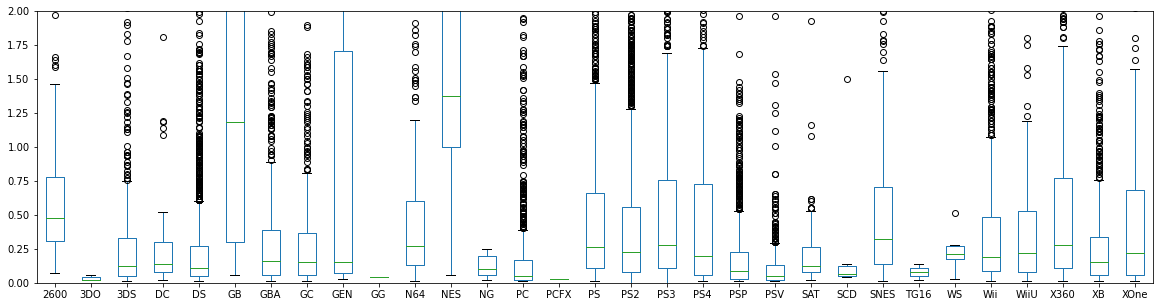

In [169]:
data.pivot_table(index = 'name', columns = 'platform', values = 'total_revenue', aggfunc = 'sum').plot(kind='box', ylim=(0,2), figsize=(20, 5))


<AxesSubplot:>

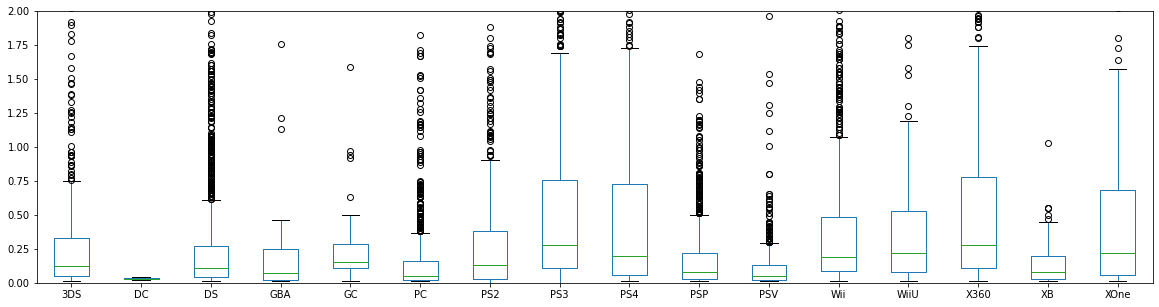

In [170]:
data.query('year > 2005').pivot_table(index = 'name', columns = 'platform', values = 'total_revenue', aggfunc = 'sum').plot(kind='box', ylim=(0,2), figsize=(20, 5))


**Вывод**
Хорошие показатели также можно заметить у платформ XOne и PS3. XOne - новое поколение игровых консолей, анонс состоялся в 2013 г. Преемница X360, очевидно, не вошла в топ-10 по той причине, что игр для нее пока мало, но со временем это может измениться, будем считать ее потенциально прибыльной. 

In [171]:
PS4 = data.query('platform == "PS4"')[['user_score', 'critic_score', 'total_revenue']].corr()
print(f' Корреляция для платформы PS4 \n {PS4}\n')

XOne = data.query('platform == "XOne"')[['user_score', 'critic_score', 'total_revenue']].corr()
print(f' Корреляция для платформы XOne \n {XOne}\n')

Wii = data.query('platform == "Wii"')[['user_score', 'critic_score', 'total_revenue']].corr()
print(f' Корреляция для платформы Wii \n {Wii}\n')


 Корреляция для платформы PS4 
                user_score  critic_score  total_revenue
user_score       1.000000      0.557654      -0.031957
critic_score     0.557654      1.000000       0.406568
total_revenue   -0.031957      0.406568       1.000000

 Корреляция для платформы XOne 
                user_score  critic_score  total_revenue
user_score       1.000000      0.472462      -0.068925
critic_score     0.472462      1.000000       0.416998
total_revenue   -0.068925      0.416998       1.000000

 Корреляция для платформы Wii 
                user_score  critic_score  total_revenue
user_score       1.000000      0.688285       0.112831
critic_score     0.688285      1.000000       0.177907
total_revenue    0.112831      0.177907       1.000000



**Вывод**
Во всех случаях выявлена несильная связь между оценкой критиков и продажами. Оценка пользователей не влияет на продажи. Мы можем сказать, что большинство пользователей большое опираются на собственное мнение при покупке игры.

In [172]:
top_genre = pd.pivot_table(data, values='total_revenue', index='genre',
                              aggfunc={'total_revenue': sum}).sort_values(by='total_revenue') 
top_genre

,total_revenue
genre,
Strategy,172.57
Adventure,233.33
Puzzle,239.89
Simulation,387.96
Fighting,442.66
Racing,723.49
Misc,790.29
Platform,825.55
Role-Playing,931.08


In [1]:
top_genre.plot(kind='bar', color = '#FF4040', figsize=(15,5))


NameError: name 'top_genre' is not defined

In [174]:
data.groupby('genre')['total_revenue'].median().sort_values()

genre
Adventure       0.05
Puzzle          0.10
Strategy        0.10
Simulation      0.15
Misc            0.16
Role-Playing    0.18
Action          0.19
Racing          0.19
Fighting        0.21
Sports          0.22
Shooter         0.24
Platform        0.27
Name: total_revenue, dtype: float64

In [175]:
data['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Опираясь на медианные значения продаж каждого жанра, можно сделать вывод о том, что жанры **Platform, Shooter и Sports чаще остадьных имеют высокие продажи, а именно 0.27, 0.24 и 0.22 соответсвенно**. Высокие показатели Action вероятно связаны с тем, что игр этого жанра очень много.

## Портрет пользователя каждого региона

### NA

<AxesSubplot:xlabel='platform'>

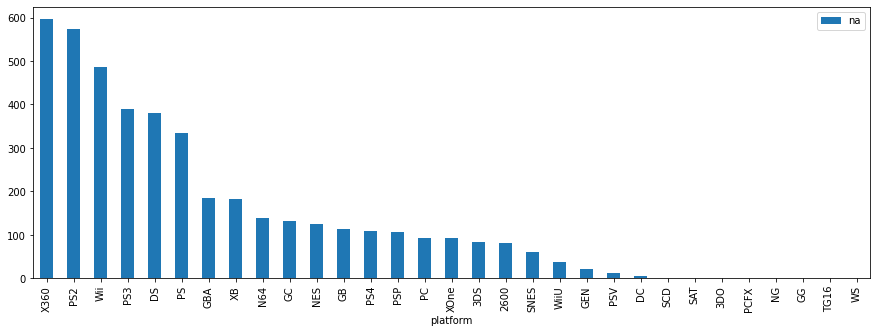

In [176]:
data.pivot_table(index = 'platform', values = 'na', aggfunc = 'sum').sort_values(ascending=False, by = 'na').plot(kind = 'bar', figsize=(15,5))


<AxesSubplot:xlabel='genre'>

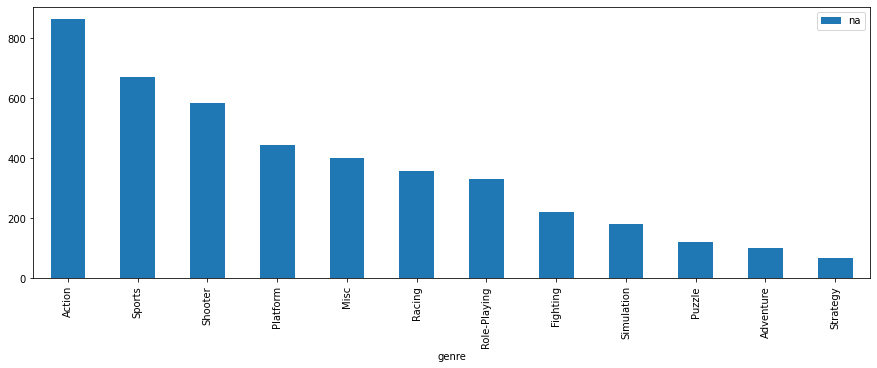

In [177]:
data.pivot_table(index = 'genre', values = 'na', aggfunc = 'sum').sort_values(ascending=False, by = 'na').plot(kind = 'bar', figsize=(15,5))


<AxesSubplot:xlabel='rating'>

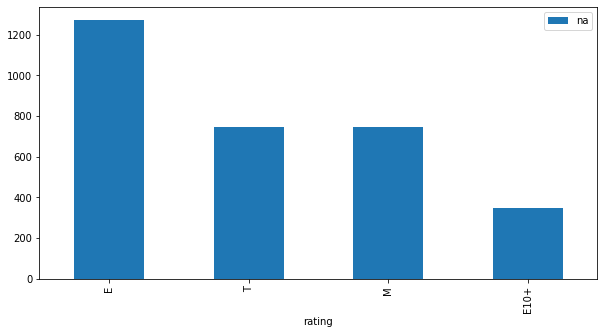

In [178]:
data.pivot_table(index = 'rating', values = 'na', aggfunc = 'sum').sort_values(ascending=False, by = 'na').plot(kind = 'bar', figsize=(10,5))


<AxesSubplot:xlabel='rating'>

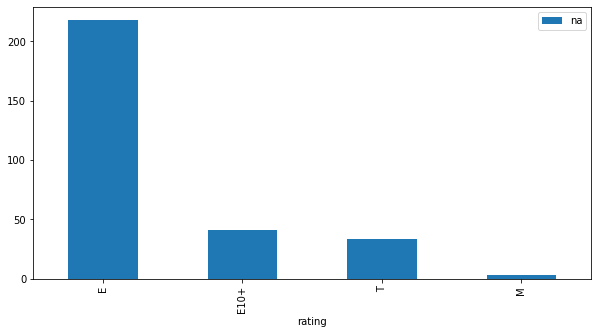

In [179]:
data.query('us_score_unknown == "unknown"').pivot_table(index = 'rating', values = 'na', aggfunc = 'sum').sort_values(ascending=False, by = 'na').plot(kind = 'bar', figsize=(10,5))


### EU


<AxesSubplot:xlabel='platform'>

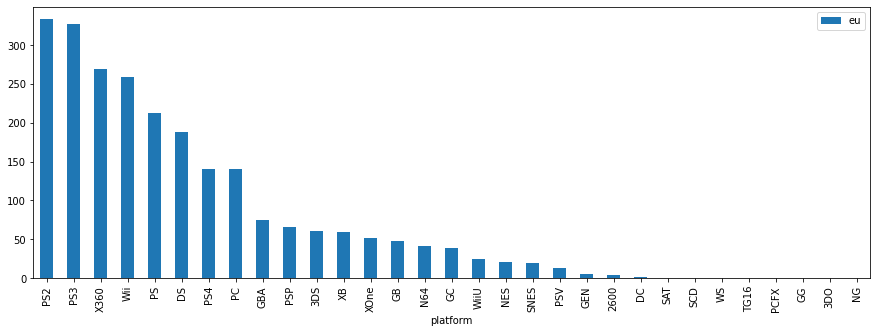

In [180]:
data.pivot_table(index = 'platform', values = 'eu', aggfunc = 'sum').sort_values(ascending=False, by = 'eu').plot(kind = 'bar', figsize=(15,5))


<AxesSubplot:xlabel='genre'>

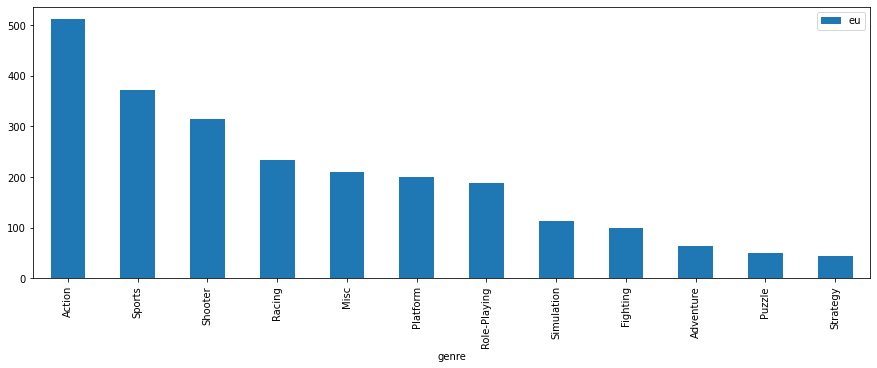

In [181]:
data.pivot_table(index = 'genre', values = 'eu', aggfunc = 'sum').sort_values(ascending=False, by = 'eu').plot(kind = 'bar', figsize=(15,5))


<AxesSubplot:xlabel='rating'>

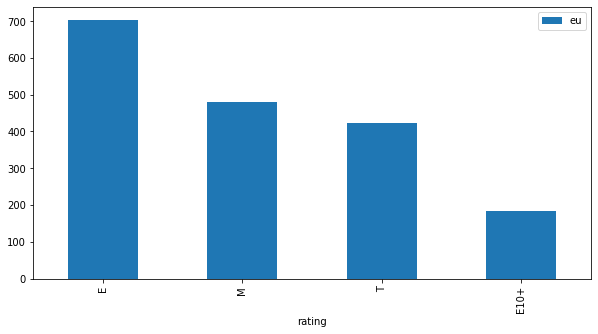

In [182]:
data.pivot_table(index = 'rating', values = 'eu', aggfunc = 'sum').sort_values(ascending=False, by = 'eu').plot(kind = 'bar', figsize=(10,5))


<AxesSubplot:xlabel='rating'>

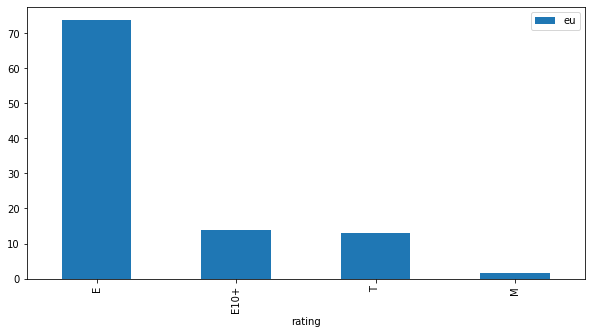

In [183]:
data.query('us_score_unknown == "unknown"').pivot_table(index = 'rating', values = 'eu', aggfunc = 'sum').sort_values(ascending=False, by = 'eu').plot(kind = 'bar', figsize=(10,5))


### JP

<AxesSubplot:xlabel='platform'>

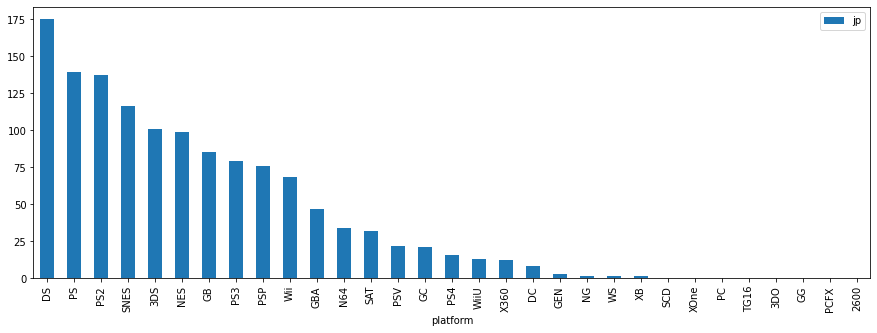

In [131]:
data.pivot_table(index = 'platform', values = 'jp', aggfunc = 'sum').sort_values(ascending=False, by = 'jp').plot(kind = 'bar', figsize=(15,5))


<AxesSubplot:xlabel='genre'>

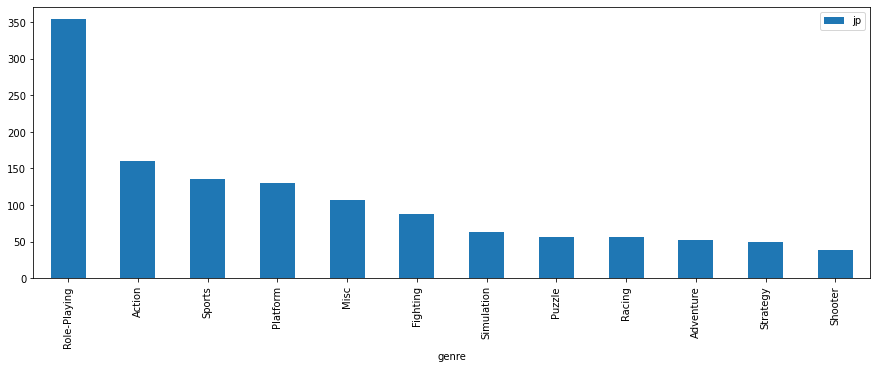

In [132]:
data.pivot_table(index = 'genre', values = 'jp', aggfunc = 'sum').sort_values(ascending=False, by = 'jp').plot(kind = 'bar', figsize=(15,5))


<AxesSubplot:xlabel='rating'>

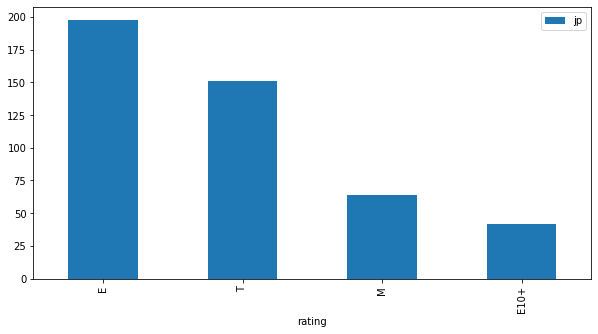

In [133]:
data.pivot_table(index = 'rating', values = 'jp', aggfunc = 'sum').sort_values(ascending=False, by = 'jp').plot(kind = 'bar', figsize=(10,5))


<AxesSubplot:xlabel='rating'>

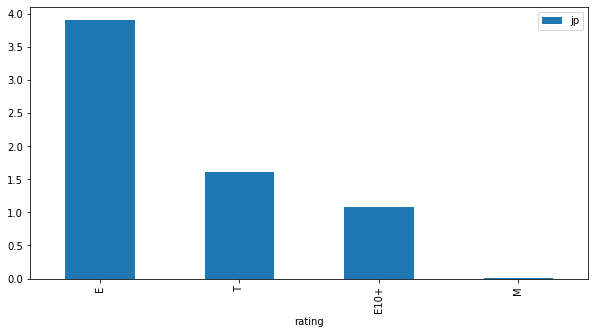

In [184]:
data.query('us_score_unknown == "unknown"').pivot_table(index = 'rating', values = 'jp', aggfunc = 'sum').sort_values(ascending=False, by = 'jp').plot(kind = 'bar', figsize=(10,5))


**Вывод**<br>
* В Северной Америке предпочитают отечетсвенного производителя Xbox, другие страны больше скллоняются к Японским DS  и PS
* В Америке и Европе любимый жанр игр - экшн, спротивные симуляторы и шутеры. В то время как в Японии больше предпочитаю ролевые игры
*  Рейтинг ESRB не влияет на продажи в отдельных регионах
*  Игры без рейтинга составляют около 10% от всех. Отдельный анализ показал, что в во всех странах самыми популярными остаются игры категории Е (для всех), второе и третье место делять игры для подростков и для детей старше 10 лет. 

<AxesSubplot:xlabel='rating'>

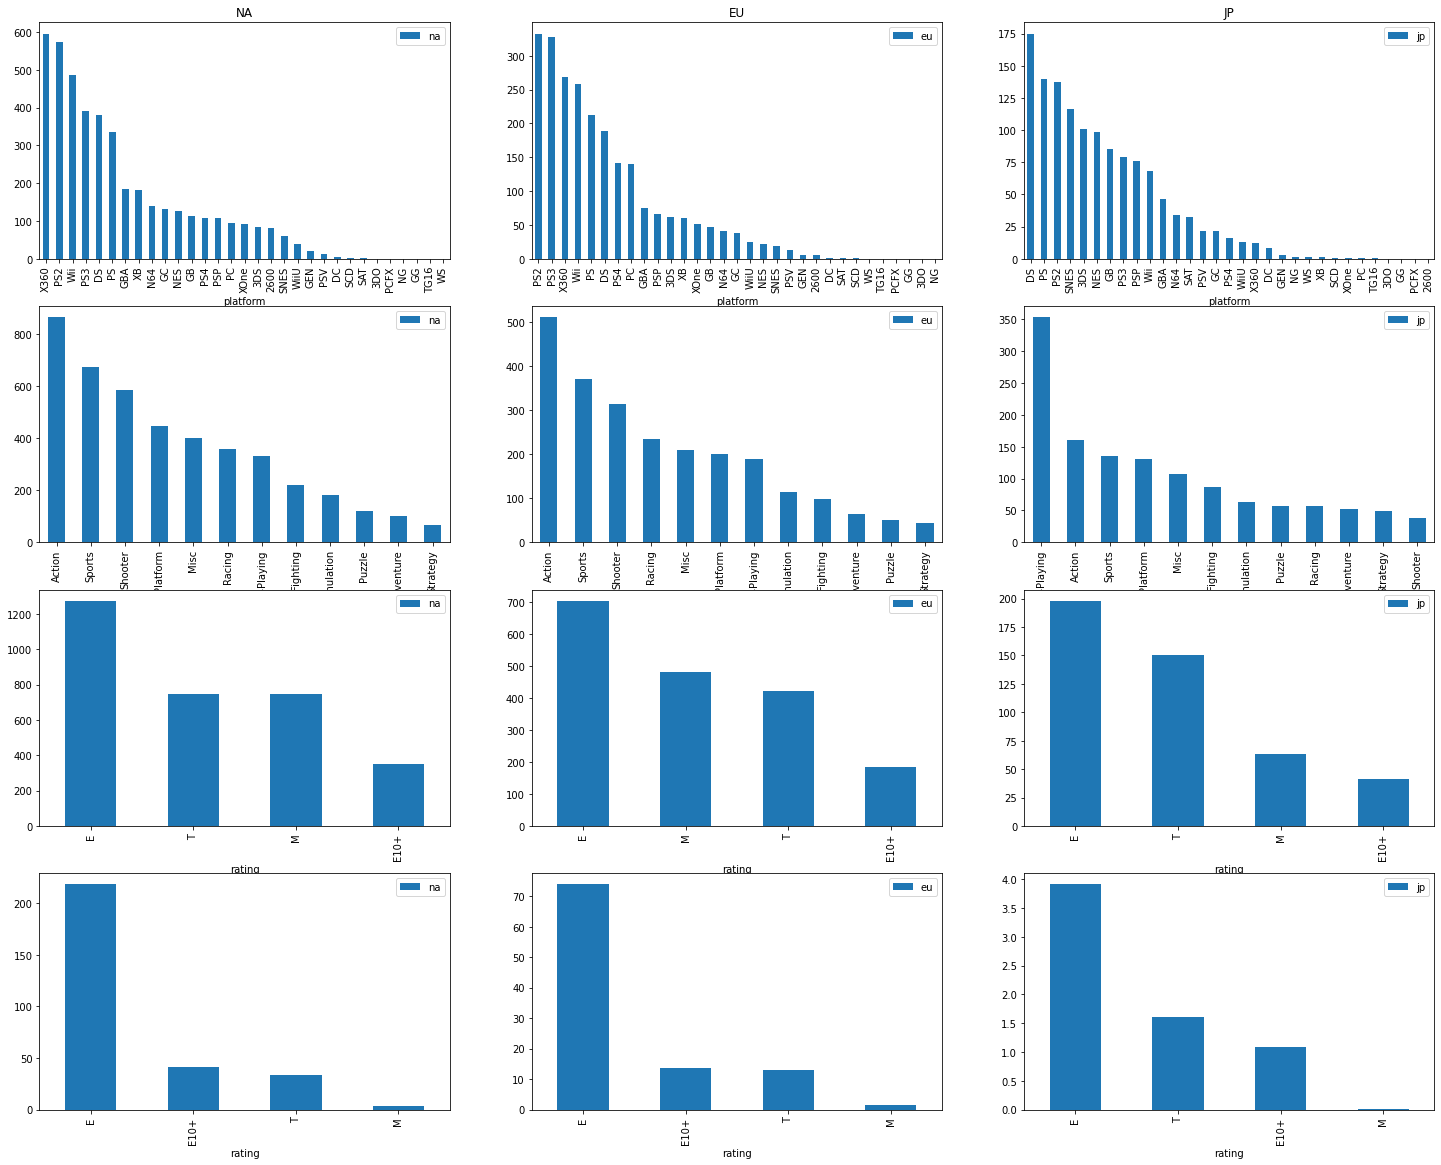

In [215]:
fig, axes = plt.subplots(4, 3, figsize=(25, 20)) # :*)

data.pivot_table(index = 'platform', values = 'na', aggfunc = 'sum').sort_values(ascending=False, by = 'na').plot(ax=axes[0,0],kind = 'bar', title="NA")
data.pivot_table(index = 'genre', values = 'na', aggfunc = 'sum').sort_values(ascending=False, by = 'na').plot(ax=axes[1,0], kind = 'bar')
data.pivot_table(index = 'rating', values = 'na', aggfunc = 'sum').sort_values(ascending=False, by = 'na').plot(ax=axes[2,0],kind = 'bar')
data.query('us_score_unknown == "unknown"').pivot_table(index = 'rating', values = 'na', aggfunc = 'sum').sort_values(ascending=False, by = 'na').plot(ax=axes[3,0],kind = 'bar')

data.pivot_table(index = 'platform', values = 'eu', aggfunc = 'sum').sort_values(ascending=False, by = 'eu').plot(ax=axes[0,1],kind = 'bar', title="EU")
data.pivot_table(index = 'genre', values = 'eu', aggfunc = 'sum').sort_values(ascending=False, by = 'eu').plot(ax=axes[1,1], kind = 'bar')
data.pivot_table(index = 'rating', values = 'eu', aggfunc = 'sum').sort_values(ascending=False, by = 'eu').plot(ax=axes[2,1],kind = 'bar')
data.query('us_score_unknown == "unknown"').pivot_table(index = 'rating', values = 'eu', aggfunc = 'sum').sort_values(ascending=False, by = 'eu').plot(ax=axes[3,1],kind = 'bar')

data.pivot_table(index = 'platform', values = 'jp', aggfunc = 'sum').sort_values(ascending=False, by = 'jp').plot(ax=axes[0,2],kind = 'bar', title="JP")
data.pivot_table(index = 'genre', values = 'jp', aggfunc = 'sum').sort_values(ascending=False, by = 'jp').plot(ax=axes[1,2], kind = 'bar')
data.pivot_table(index = 'rating', values = 'jp', aggfunc = 'sum').sort_values(ascending=False, by = 'jp').plot(ax=axes[2,2],kind = 'bar')
data.query('us_score_unknown == "unknown"').pivot_table(index = 'rating', values = 'jp', aggfunc = 'sum').sort_values(ascending=False, by = 'jp').plot(ax=axes[3,2],kind = 'bar')


## Проверка гипотез

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

In [34]:
# H0 - Средние пользовательские рейтиниги одинаковые
# H1 - Средние пользовательские рейтиги разные


PC = data.query('platform == "PC" and user_score > 0 ')['user_score']
XOne = data.query('platform == "XOne" and user_score >0')['user_score']             

print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())


alpha = .05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 7.065960264900661
p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


**Вывод** Средние пользовательские рейтинги платформ Xbox One и PC разные;

* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [35]:
# H0 - Средние пользовательские рейтиниги одинаковые
# H1 - Средние пользовательские рейтиги разные

Action = data.query('genre == "Action" and user_score > 0 ')['user_score']
Sports = data.query('genre == "Sports" and user_score > 0')['user_score']      

print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())


alpha = .05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра Action: 7.058129175946549
Средний пользовательский рейтинг жанра Sports 6.951433857539316
p-значение: 0.07370217419278526
Не удалось отвергнуть нулевую гипотезу


**Вывод** Так как нулевую гипотезу отвергнуть не получилось, мы можем сделтаь вывод о том, что средние пользовательские рейтинги разные.

 ## Общий вывод

Задачей проекта было выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

На этапе предобработки данных были исправлены некоторые ошибки в типах данных, также мы обработали пропуски и добавили ноывй столбец. 

**Общий анализ данных показал, что:**
* В последний период наиболее популярной стала **PS4, ее считаем потенциально прибыльной**
* средняя продолжительность существования платформы - 10 лет, пик продаж каждой приходится на середину ее существования. 
* Новая платформа появляется примерно каждые 4 года.

* **потенциальной прибыльно можно считать PC**, так как ее показатели довольно стабилны с 2006 года 
* С 2010 года мы наблюдаем резкий спад популярности игр. Скорее всего это связано с растущей популярностью мобильных приложений. (https://apptractor.ru/info/articles/evolyutsiya-v-vashem-karmane-kak-razvivalis-mobilnyie-prilozheniya.html)

* Хорошие показатели также можно заметить у платформ XOne и PS3. **XOne** - новое поколение игровых консолей, преемница X360, очевидно, не вошла в топ-10 по той причине, что игр для нее пока мало, но со временем это может измениться, **будем считать ее потенциально прибыльной.**
* Во всех случаях выявлена несильная связь между оценкой критиков и продажами. Оценка пользователей не влияет на продажи. 
* Самым выгодным жанр является Action, за ним Sports и Shooter. Наименее выгоднми оказались Strategy, Adneture и Puzzle.

**Также были составлены портреты пользователя каждого региона, мы выяснили, что:**
* В Северной Америке предпочитают отечетсвенного производителя Xbox, другие страны больше скллоняются к Японским DS  и PS
* В Америке и Европе любимый жанр игр - экшн, спротивные симуляторы и шутеры. В то время как в Японии больше предпочитаю ролевые игры
*  Рейтинг ESRB не влияет на продажи в отдельных регионах

Еще одной задачей была проверка двух гипотез. Юыло выявлено, что:

* **Средние пользовательские рейтинги платформ Xbox One и PC разные**
* **Средние пользовательские рейтинги жанров Action и Sports разные**


**Жанр и рейтинг определяют успешность игры. Исследование показало, что наиболее поплярными являются жанры Sports, Actoins, Shooter, Platform. Рейтинги E, M, T являются наиболее предпочтительными у пользователей.**
